In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import venn

In [2]:
from matplotlib.pylab import mpl

In [3]:
datas = pd.DataFrame(columns=['datasets', 'log_p', 'is_shuffle'])

In [4]:
data1 = pd.read_csv('./megs/embryo2_all_mutnum.csv', index_col=0)
data2 = pd.read_csv('./megs/embryo3_all_mutnum.csv', index_col=0)
data_p = np.log10(np.concatenate((data1['q_value'], data2['q_value'])))

data1s = pd.read_csv('./megs/embryo2_all_shuffle.csv', index_col=0)
data2s = pd.read_csv('./megs/embryo3_all_shuffle.csv', index_col=0)
data_ps = np.log10(np.concatenate((data1s['q_value'], data2s['q_value'])))

embryo_megs = np.concatenate((data1.index, data2.index))

/tmp/ipykernel_38348/3636159433.py:3: RuntimeWarning: divide by zero encountered in log10
  data_p = np.log10(np.concatenate((data1['q_value'], data2['q_value'])))


In [5]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['Embryo E8/E8.5']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)

/tmp/ipykernel_38348/2585355696.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas = datas.append(data)


In [6]:
data1 = pd.read_csv('/home/wangkun/datas/megs/3726_NT_T1.csv', index_col=0)
data2 = pd.read_csv('/home/wangkun/datas/megs/3435_NT_T1.csv', index_col=0)
data_p = np.log10(np.concatenate((data1['p-value'], data2['p-value'])))

data1s = pd.read_csv('/home/wangkun/datas/shuffle_megs/KP3435_shuffle_megs.csv', index_col=0)
data2s = pd.read_csv('/home/wangkun/datas/shuffle_megs/KP3726_shuffle_megs.csv', index_col=0)
data_ps = np.log10(np.concatenate((data1s['p-value'], data2s['p-value'])))

kp_megs = np.concatenate((data1.index, data2.index))

In [7]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['KP lung tumor']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)

In [6]:
data1 = pd.read_csv('./megs/KPCY.csv', index_col=0)
data_p = np.log10((data1['q_value']))

data1s = pd.read_csv('./megs/KPCY_shuffle.csv', index_col=0)
data_ps = np.log10((data1s['q_value']))

kpcy_megs = np.array(data1.index)

In [7]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['KPCY']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)

/tmp/ipykernel_38348/666097374.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas = datas.append(data)


In [8]:
data1 = pd.read_csv('./megs/a549-lg1_nc.csv', index_col=0)
data2 = pd.read_csv('./megs/a549-lg2_nc.csv', index_col=0)
data_p = np.log10(np.concatenate((data1['q_value'], data2['q_value'])))

data1s = pd.read_csv('./megs/a549-lg1_nc_shuffle.csv', index_col=0)
data2s = pd.read_csv('./megs/a549-lg2_nc_shuffle.csv', index_col=0)
data_ps = np.log10(np.concatenate((data1s['q_value'], data2s['q_value'])))

a549_megs = np.concatenate((data1.index, data2.index))

In [9]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['A549']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)

/tmp/ipykernel_38348/1307281641.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas = datas.append(data)


In [10]:
data1 = pd.read_csv('./megs/HEK293T.csv', index_col=0)
data_p = np.log10((data1['q_value']))

data1s = pd.read_csv('./megs/HEK293T_shuffle.csv', index_col=0)
data_ps = np.log10((data1s['q_value']))

hek_megs = np.array(data1.index)

In [11]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['HEK293T']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)



/tmp/ipykernel_38348/2138768528.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datas = datas.append(data)


In [12]:
datas['log_p'] = datas['log_p'].astype(float)

In [18]:
datas['log_p'] = np.clip(datas['log_p'], a_min=-10, a_max=2)

In [19]:
sns.set(font_scale=1.4)
sns.set_style('whitegrid')

In [20]:
def convert(x):
    if x == 'False':
        return 'Standard analysis'
    else:
        return 'Permutation analysis'

In [21]:
datas['new'] = datas['is_shuffle'].apply(convert)

Text(0.5, 0, '')

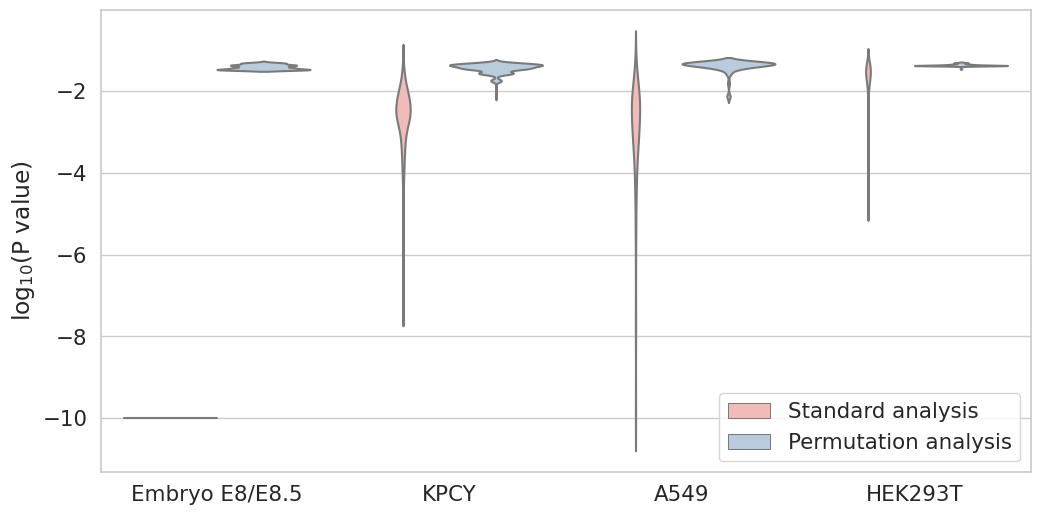

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(data=datas, x='datasets', y='log_p', hue='new', palette="Pastel1", inner=None, ax=ax)

# ax.tick_params(axis='x', labelrotation=20)
ax.legend(loc=4)
ax.set_ylabel('log$_{10}$(P value)')
ax.set_xlabel('')
# x0,x1 = ax.get_xlim()
# ax.hlines(np.log10(0.01), x0, x1, linestyles='dashed', colors='black')
# ax.set_xlim(x0, x1)

In [23]:
import matplotlib

In [33]:
vels_em1 = pd.read_csv('./megs/embryo1_all_mutnum.csv', index_col=0)
vels_em2 = pd.read_csv('./megs/embryo2_all_mutnum.csv', index_col=0)
vels_em3 = pd.read_csv('./megs/embryo3_all_mutnum.csv', index_col=0)
vels_em6 = pd.read_csv('./megs/embryo6_all_mutnum.csv', index_col=0)
a549_lg1 = pd.read_csv('./megs/a549-lg1_nc.csv', index_col=0)
a549_lg2 = pd.read_csv('./megs/a549-lg2_nc.csv', index_col=0)
kpcy = pd.read_csv('./megs/KPCY.csv', index_col=0)
hek = pd.read_csv('./megs/HEK293T.csv', index_col=0)

In [34]:
embryo_genes = set(sum([list(vels_em1.index),list(vels_em2.index),list(vels_em3.index),list(vels_em6.index)], []))
a549_genes = set(list(a549_lg1.index) + list(a549_lg2.index))
kpcy_genes = set(list(kpcy.index))
hek_genes = set(list(hek.index))

In [23]:
# kp_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/KP3435.csv', index_col=0).to_numpy().flatten())).union(set(list(pd.read_csv('/home/wangkun/datas/gene_list/KP3726.csv', index_col=0).to_numpy().flatten())))
# a549_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/lg1.csv', index_col=0).to_numpy().flatten())).union(set(list(pd.read_csv('/home/wangkun/datas/gene_list/lg2.csv', index_col=0).to_numpy().flatten())))
# hek_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/HEK293T.csv', index_col=0).to_numpy().flatten()))
# kpcy_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/KPCY.csv', index_col=0).to_numpy().flatten()))

/home/wangkun/miniconda3/lib/python3.9/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn2()` is retained for backwards compatibility; use `venn()` instead
  warn((


(<Figure size 900x900 with 1 Axes>, <AxesSubplot: >)

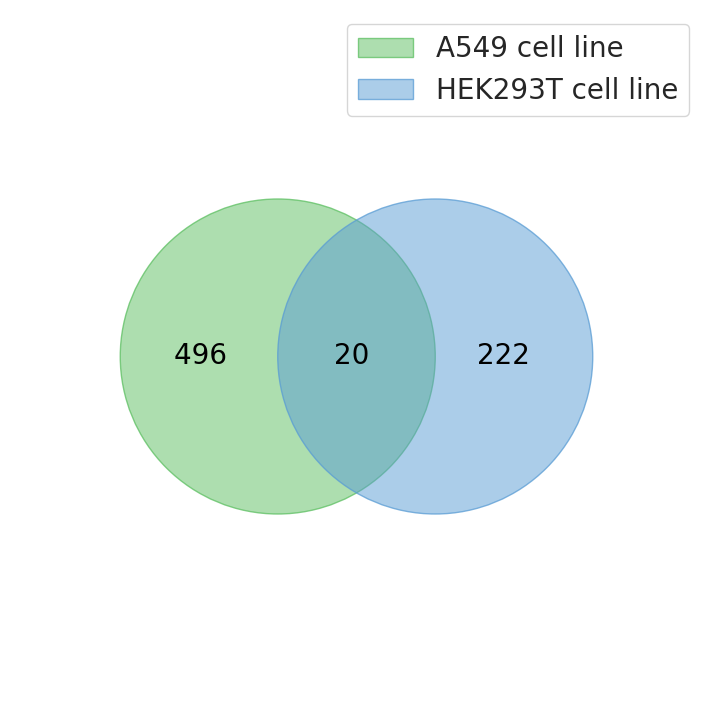

In [36]:
labels = venn.get_labels([a549_genes, hek_genes])
venn.venn2(labels, names=['A549 cell line', 'HEK293T cell line'], fontsize=20)

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

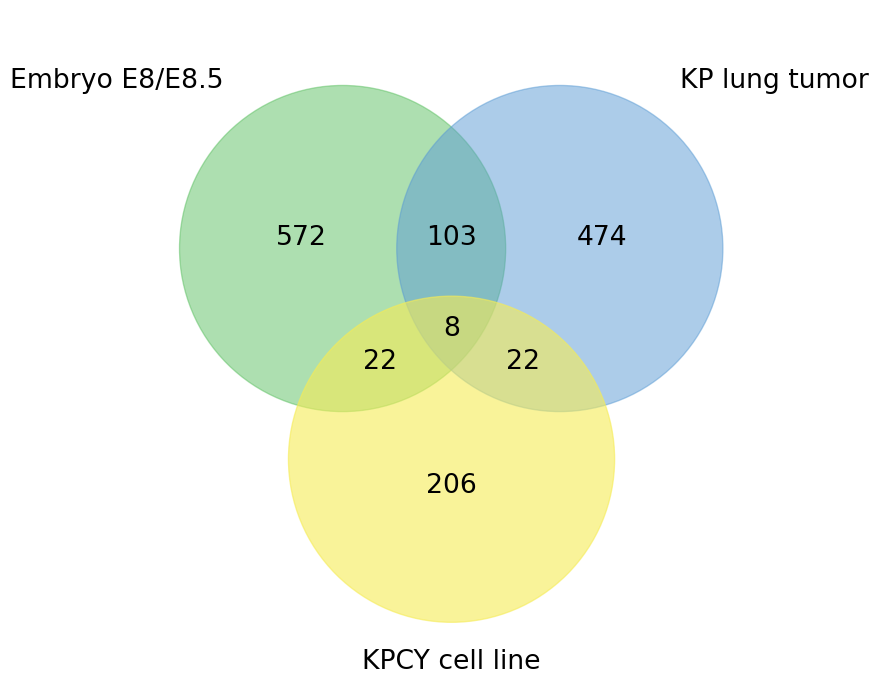

In [53]:
labels = venn.get_labels([embryo_megs, kp_megs, kpcy_megs])
venn.venn3(labels, names=['Embryo E8/E8.5', 'KP lung tumor', 'KPCY cell line'], fontsize=20)

(<Figure size 864x672 with 1 Axes>, <AxesSubplot:>)

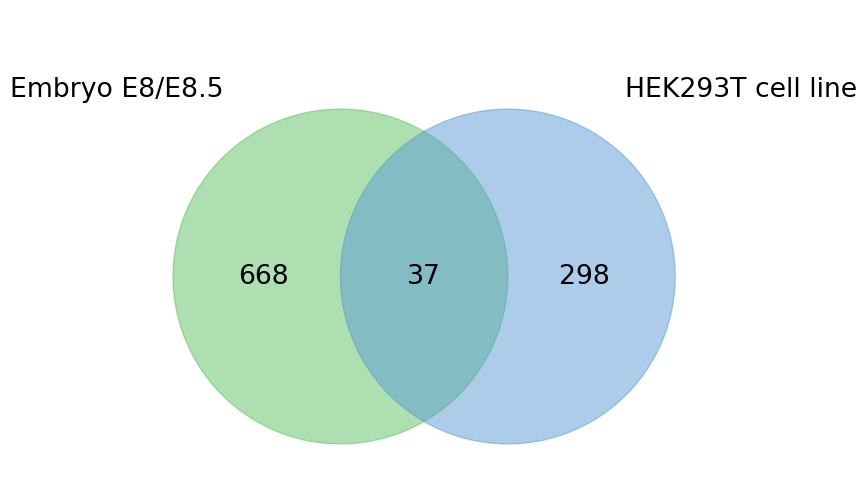

In [58]:
labels = venn.get_labels([set([i.lower() for i in embryo_megs]), set([i.lower() for i in hek_megs])])
venn.venn2(labels, names=['Embryo E8/E8.5', 'HEK293T cell line'], fontsize=20)

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

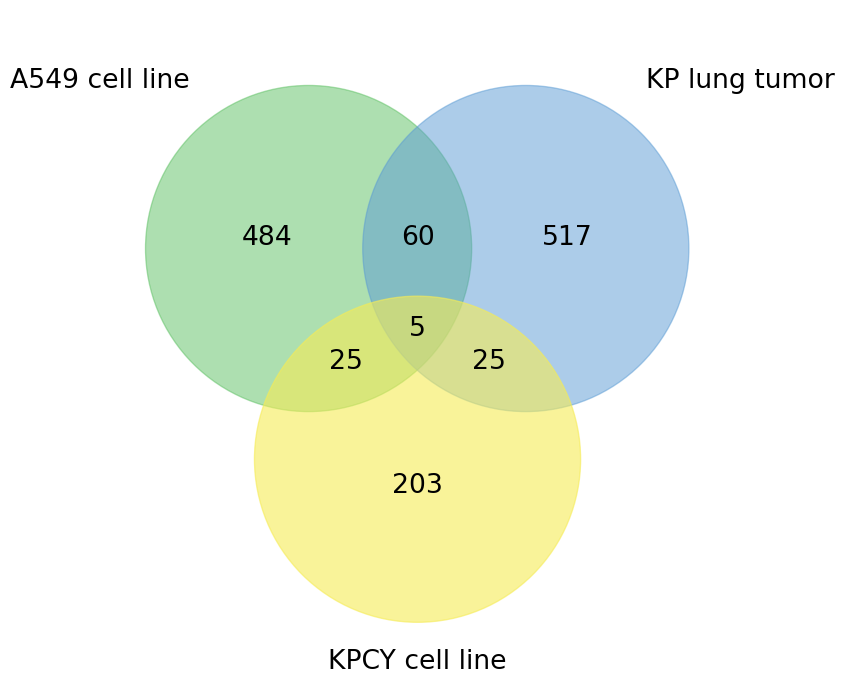

In [57]:
labels = venn.get_labels([set([i.lower() for i in a549_megs]), set([i.lower() for i in kp_megs]), set([i.lower() for i in kpcy_megs])])
venn.venn3(labels, names=['A549 cell line', 'KP lung tumor', 'KPCY cell line'], fontsize=20)